In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('2019.csv')
df.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


## CHECKING NULL DATA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Dari pengecekan info dan isna, tidak ada missing data
<hr>

# SOAL 1

### 1. Untuk feature/column Generosity & Perceptions of corruption, hitung dan beri penjelasan
(insight) terkait:

Titik Pusat Data (Central Tendency)

Persebaran Data (Dispersion)

Distribusi Data (Distribution)

- Feature Generosity & Perceptions of Corruption tidak memiliki missing data dan tipe data float.
- Metode Mean dan Median bisa menjadi metode untuk memnentukan titik pusat data
- Melakukan pengecekkan apakah terdapat data outliers pada feature Generosity dan Perceptions of Corruption

C:\Users\ANDITO PRAMADIKA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


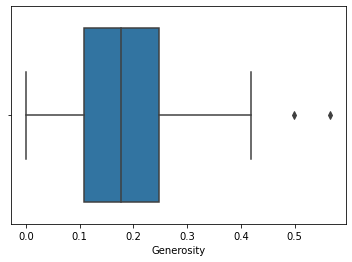

In [11]:
# Cek data outlier pada data Generosity
sns.boxplot(df['Generosity'])
plt.show()

C:\Users\ANDITO PRAMADIKA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


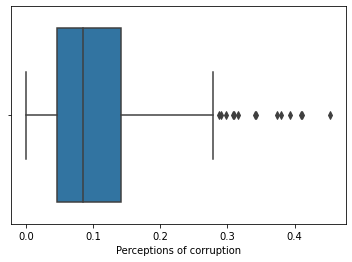

In [15]:
# Cek data outlier pada data Perceptions of Corruption
sns.boxplot(df['Perceptions of corruption'])
plt.show()

Jika dilihat dari data diatas,

1. Data Generosity memiliki data outliers. Maka untuk data ini bisa dipakai metode Median (1 saja data outlier bisa memiliki efek besar pada Mean)

2. Data Perceptions of Corruption memiliki banyak data outliers. Maka untuk data ini bisa dipakai metode Median

## TITIK PUSAT DATA

In [27]:
# Penentuan titik pusat data untuk feature Generosity
q1_g = df['Generosity'].quantile(0.25)
q2_g = df['Generosity'].quantile(0.50)
q3_g = df['Generosity'].quantile(0.75)
iqr_g = q3_g - q1_g
lower_whisker_g = q1_g - 1.5*iqr_g
upper_whisker_g = q3_g + 1.5*iqr_g
print(f'Nilai tengah dari feature Generosity adalah {q2_g}')
print(f'Nilai bawah dari feature Generosity adalah {q1_g}')
print(f'Nilai atas dari feature Generosity adalah {q3_g}')
print(f'Dengan Low Whisker {lower_whisker_g} dan upper whisker {upper_whisker_g}')

Nilai tengah dari feature Generosity adalah 0.1775
Nilai bawah dari feature Generosity adalah 0.10875
Nilai atas dari feature Generosity adalah 0.24825
Dengan Low Whisker -0.10050000000000002 dan upper whisker 0.4575


In [29]:
# Penentuan titik pusat data untuk feature Perceptions of corruption
q1_c = df['Perceptions of corruption'].quantile(0.25)
q2_c = df['Perceptions of corruption'].quantile(0.50)
q3_c = df['Perceptions of corruption'].quantile(0.75)
iqr_c = q3_c - q1_c
lower_whisker_c = q1_c - 1.5*iqr_c
upper_whisker_c = q3_c + 1.5*iqr_c
print(f'Nilai tengah dari feature Perceptions of corruption adalah {q2_c}')
print(f'Nilai bawah dari feature Perceptions of corruption adalah {q1_c}')
print(f'Nilai atas dari feature Perceptions of corruption adalah {q3_c}')
print(f'Dengan Low Whisker {lower_whisker_c} dan upper whisker {upper_whisker_c}')

Nilai tengah dari feature Perceptions of corruption adalah 0.08549999999999999
Nilai bawah dari feature Perceptions of corruption adalah 0.047
Nilai atas dari feature Perceptions of corruption adalah 0.14125
Dengan Low Whisker -0.09437499999999997 dan upper whisker 0.28262499999999996


### Dari 156 Negara yang berada di list, jika dilihat dari persebaran datanya. Tingkat Generosity berada di level 0.10875 dan 0.24825, Dan memiliki Perceptions of Corruption di level 0.047 dan 0.14125

## Persebaran Data

In [48]:
stdev_Generosity = df['Generosity'].std()
stdev_corruption = df['Perceptions of corruption'].std()


print(f'Standard Deviation dari feature Generosity adalah {stdev_Generosity}')
print(f'Standard Deviation dari feature Perceptions of corruption adalah {stdev_corruption}')


Standard Deviation dari feature Generosity adalah 0.09525444050922018
Standard Deviation dari feature Perceptions of corruption adalah 0.09453783536745279


### Variasi data dari Generosity dan Perceptions of corruption memiliki standar deviasi mendekati 0, maka bisa dibilang set data memiliki angka yang mendekati satu sama lainnya

## Distribusi Data

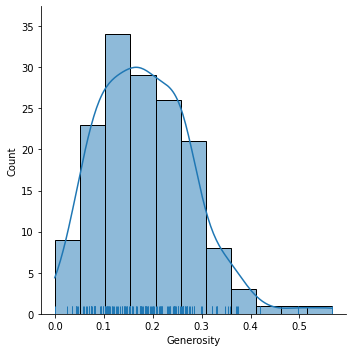

In [45]:
sns.displot(df['Generosity'],rug=True,kde=True)
plt.show()

In [46]:
stats.skewtest(df['Generosity']), stats.kurtosistest(df['Generosity'])

(SkewtestResult(statistic=3.569634885936533, pvalue=0.0003574791159883303),
 KurtosistestResult(statistic=2.30325294084923, pvalue=0.021264615709953347))

Distribusi data di data Generosity adalah Distribusi Normal. Untuk data Generosity, dari 156 Negara kurang lebih memiliki angka yang sama 
<hr>

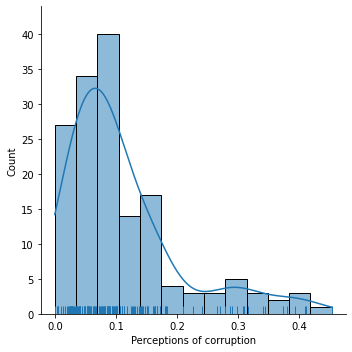

In [44]:
sns.displot(df['Perceptions of corruption'],rug=True,kde=True)
plt.show()

In [47]:
stats.skewtest(df['Perceptions of corruption']), stats.kurtosistest(df['Perceptions of corruption'])

(SkewtestResult(statistic=6.436967399893586, pvalue=1.2188409846857602e-10),
 KurtosistestResult(statistic=3.519300687981109, pvalue=0.00043268601039997434))

Distribusi data di data Perceptions of corruption adalah Distribusi Right Skewed. Beberapa negara memiliki Perceptions of corruption lebih tinggi daripada negara lainnya
<hr>

# SOAL 2

### 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Social support ! Tambahkan plot untuk menampilkan adanya data outlier!

C:\Users\ANDITO PRAMADIKA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


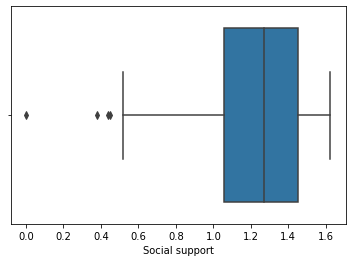

In [49]:
sns.boxplot(df['Social support'])
plt.show()

In [50]:
# Penentuan titik pusat data untuk feature Generosity
q1_s = df['Social support'].quantile(0.25)
q2_s = df['Social support'].quantile(0.50)
q3_s = df['Social support'].quantile(0.75)
iqr_s = q3_s - q1_s
lower_whisker_s = q1_s - 1.5*iqr_s
upper_whisker_s = q3_s + 1.5*iqr_s
print(f'Nilai tengah dari feature Social support adalah {q2_s}')
print(f'Nilai bawah dari feature Social support adalah {q1_s}')
print(f'Nilai atas dari feature Social support adalah {q3_s}')
print(f'Dengan Low Whisker {lower_whisker_s} dan upper whisker {upper_whisker_s}')

Nilai tengah dari feature Social support adalah 1.2715
Nilai bawah dari feature Social support adalah 1.05575
Nilai atas dari feature Social support adalah 1.4525
Dengan Low Whisker 0.46062500000000006 dan upper whisker 2.047625


In [56]:
outliers_socialsupport = df[(df['Social support'] > upper_whisker_s) | (df['Social support'] < lower_whisker_s)]['Social support']
outliers_socialsupport

101    0.437
144    0.447
148    0.378
154    0.000
Name: Social support, dtype: float64

In [57]:
df['Country or region'][154]

'Central African Republic'

### Ada 4 Data Outlier, semua data dibawah Lower Whisker. Ada 1 Negara yang tidak memiliki Social Support sama sekali (Central African Republic). Dan untuk 3 sisanya memiliki Social Support yang sebenarnya masih mendekati Lower Whisker nya

# SOAL 3

### 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column Freedom to make life choices. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

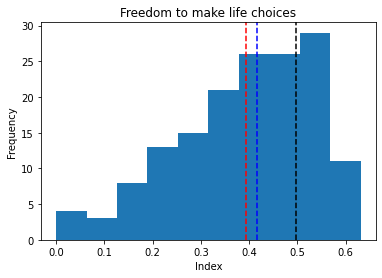

In [65]:
plt.hist('Freedom to make life choices', data=df, bins=10)
plt.title('Freedom to make life choices')
plt.xlabel('Index')
plt.ylabel('Frequency')

plt.axvline(df['Freedom to make life choices'].mean(), color = 'red', linestyle='--')
plt.axvline(df['Freedom to make life choices'].median(), color = 'blue', linestyle='--')
plt.axvline(df['Freedom to make life choices'].mode()[0], color = 'black', linestyle='--')
plt.show()

In [69]:
q1_f = df['Freedom to make life choices'].quantile(0.25)
q2_f = df['Freedom to make life choices'].quantile(0.50)
q3_f = df['Freedom to make life choices'].quantile(0.75)
iqr_f = q3_f - q1_f
lower_whisker_f = q1_f - 1.5*iqr_f
upper_whisker_f = q3_f + 1.5*iqr_f

outliers_freedom = df[(df['Freedom to make life choices'] > upper_whisker_f) | (df['Freedom to make life choices'] < lower_whisker_f)]['Freedom to make life choices']
outliers_freedom

153    0.0
Name: Freedom to make life choices, dtype: float64

In [71]:
print(df['Country or region'][153])

Afghanistan


### Distribusi data adalah Left Skewed, Mean berada di kiri Median. Ada 1 negara yang tidak memiliki freedom to life choices yaitu Afghanistan. (negara ini adalah satu-satunya data outlier dari sini)

# SOAL 4

### 4. Di antara GDP per capita, Social support, & Healthy life expectancy, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Score? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk pemerintah dalam merumuskan kebijakan?

In [72]:
gdp = df['GDP per capita']
soc_supp = df['Social support']
health_lifexp = df['Healthy life expectancy']
score = df['Score']

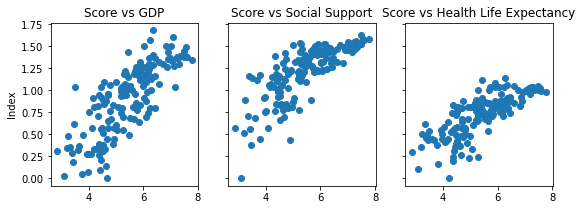

In [74]:
fig,ax = plt.subplots(1,3, figsize=(9,3), sharey=True)
ax[0].scatter(score,gdp)
ax[0].set_title('Score vs GDP')
ax[0].set_ylabel('Index')
ax[1].scatter(score, soc_supp)
ax[1].set_title('Score vs Social Support')
ax[2].scatter(score, health_lifexp)
ax[2].set_title('Score vs Health Life Expectancy')
plt.show()

In [79]:
# Menggunakan Pearson Correlation
print('Korelasi Score & GDP :')
np.corrcoef(score, gdp)

Korelasi Score & GDP :


array([[1.        , 0.79388287],
       [0.79388287, 1.        ]])

In [82]:
print('Korelasi Score & Social Support :')
np.corrcoef(score, soc_supp)

Korelasi Score & Social Support :


array([[1.        , 0.77705779],
       [0.77705779, 1.        ]])

In [84]:
print('Korelasi Score & Health Life Expectancy :')
np.corrcoef(score, health_lifexp)

Korelasi Score & Health Life Expectancy :


array([[1.        , 0.77988315],
       [0.77988315, 1.        ]])

### Dari data korelasi Pearson diatas, nilai yang mendekati Score adalah GDP. Karena memiliki angka yang paling mendekati 1. Dari data diatas, Pemerintah bisa fokus pada GDP agar Score dari Negara tersebut bisa naik seiring dengan naiknya GDP.

# SOAL 5

### 5. Hitung berapa negara yang Score kebahagiaan warganya di atas rata-rata! Dari negara-negara yang Score-nya di atas rata-rata tersebut:

Tampilkan 5 negara yang GDP per capita-nya tertinggi dalam bentuk Barplot!

Tampilkan 5 negara yang Perceptions of corruption terendah dalam bentuk Barplot!

Tampilkan 5 negara yang Generosity terendah dalam bentuk Barplot!

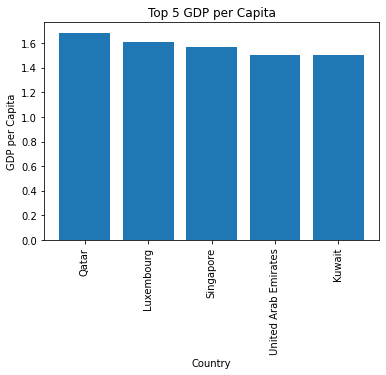

In [92]:
gdp_sorted = country_highscore.sort_values(by='GDP per capita', ascending=False).iloc[0:5]
plt.bar(gdp_sorted['Country or region'], gdp_sorted['GDP per capita'])
plt.title('Top 5 GDP per Capita')
plt.ylabel('GDP per Capita')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

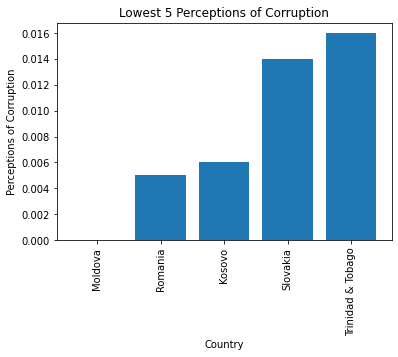

In [89]:
corruption_sorted = country_highscore.sort_values(by='Perceptions of corruption').iloc[0:5]
plt.bar(corruption_sorted['Country or region'], corruption_sorted['Perceptions of corruption'])
plt.title('Lowest 5 Perceptions of Corruption')
plt.ylabel('Perceptions of Corruption')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

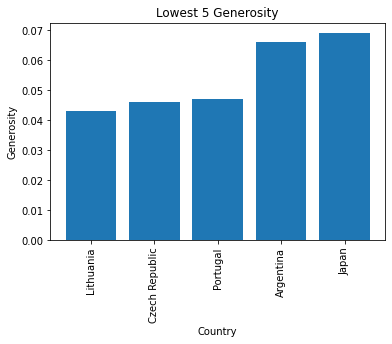

In [90]:
generosity_sorted = country_highscore.sort_values(by='Generosity').iloc[0:5]
plt.bar(generosity_sorted['Country or region'], generosity_sorted['Generosity'])
plt.title('Lowest 5 Generosity')
plt.ylabel('Generosity')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

# SOAL 6

### 6. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan Score antara negara yang GDP per capita-nya di atas rata-rata dengan yang di bawah rata-rata!

In [91]:
country_highscore = df[df.Score > df.Score.mean()]
len(country_highscore['Country or region'])

77